In [39]:
# Import required module
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [40]:
df_patient = pd.read_csv('IndividualDetails.csv', index_col=0)

display(df_patient)

,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
id,,,,,,,,,,,
0,KL-TS-P1,30/01/2020,20,F,Thrissur,Thrissur,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
1,KL-AL-P1,02/02/2020,NaN,NaN,Alappuzha,Alappuzha,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
2,KL-KS-P1,03/02/2020,NaN,NaN,Kasaragod,Kasaragod,Kerala,India,Recovered,14/02/2020,Travelled from Wuhan
3,DL-P1,02/03/2020,45,M,East Delhi (Mayur Vihar),East Delhi,Delhi,India,Recovered,15/03/2020,"Travelled from Austria, Italy"
4,TS-P1,02/03/2020,24,M,Hyderabad,Hyderabad,Telangana,India,Recovered,02/03/2020,"Travelled from Dubai to Bangalore on 20th Feb,..."
...,...,...,...,...,...,...,...,...,...,...,...
3666,NaN,04/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,NaN
3667,NaN,04/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,NaN
3668,NaN,04/04/2020,NaN,NaN,NaN,NaN,Maharashtra,NaN,Hospitalized,NaN,NaN


In [41]:
df_patient.describe(include='all')

,government_id,diagnosed_date,age,gender,detected_city,detected_district,detected_state,nationality,current_status,status_change_date,notes
count,817,3671,805,1035,822,2744,3671,427,3671,3570,2640
unique,812,37,81,2,234,261,30,10,4,34,615
top,UP-GBN-15,03/04/2020,35,M,Mumbai,Mumbai,Maharashtra,India,Hospitalized,03/04/2020,Details awaited
freq,2,563,28,782,67,247,635,368,3557,577,700


In [42]:
df_patient.dtypes

government_id         object
diagnosed_date        object
age                   object
gender                object
detected_city         object
detected_district     object
detected_state        object
nationality           object
current_status        object
status_change_date    object
notes                 object
dtype: object

In [43]:
df_patient.isnull().sum()

government_id         2854
diagnosed_date           0
age                   2866
gender                2636
detected_city         2849
detected_district      927
detected_state           0
nationality           3244
current_status           0
status_change_date     101
notes                 1031
dtype: int64

In [44]:
df_patient['age'].value_counts().to_dict()

{'35': 28,
 '21': 27,
 '32': 25,
 '45': 24,
 '55': 24,
 '40': 23,
 '65': 23,
 '24': 22,
 '27': 22,
 '23': 20,
 '52': 20,
 '22': 19,
 '25': 19,
 '38': 19,
 '26': 18,
 '34': 17,
 '39': 17,
 '60': 16,
 '63': 16,
 '33': 16,
 '41': 15,
 '47': 14,
 '37': 14,
 '36': 14,
 '50': 14,
 '20': 14,
 '30': 14,
 '48': 13,
 '42': 13,
 '28': 12,
 '31': 11,
 '49': 11,
 '54': 11,
 '53': 11,
 '58': 10,
 '59': 10,
 '57': 9,
 '18': 9,
 '56': 9,
 '43': 9,
 '69': 8,
 '44': 8,
 '70': 8,
 '61': 8,
 '46': 7,
 '68': 7,
 '29': 7,
 '64': 6,
 '19': 6,
 '66': 6,
 '51': 6,
 '67': 6,
 '3': 5,
 '75': 5,
 '1': 5,
 '17': 5,
 '28-35': 4,
 '7': 4,
 '76': 3,
 '11': 3,
 '62': 3,
 '74': 3,
 '85': 2,
 '81': 2,
 '72': 2,
 '2': 2,
 '78': 2,
 '13': 2,
 '16': 2,
 '73': 2,
 '14': 2,
 '10': 2,
 '15': 2,
 '9': 1,
 '12': 1,
 '92': 1,
 '89': 1,
 '96': 1,
 '6': 1,
 '71': 1,
 '77': 1}

In [45]:
df_patient['diagnosed_date'] = pd.to_datetime(df_patient['diagnosed_date'])

# Change age range (ex: 10-20) into median value
for data in df_patient['age'].unique().astype(str):
    if data.find('-') != -1:
        temp = data.split('-')
        if int(temp[1])-int(temp[0]) < 15:
            median = ( int(temp[1])+int(temp[0]) ) / 2
            df_patient.age = df_patient.age.replace({data:median})
        else:
            df_patient.age = df_patient.age.replace({data:np.nan})

df_patient['age'] = df_patient['age'].astype(float)
bins = [0,10,20,30,40,50,60,70,80,90,100]
labels = ['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99']
df_patient['age_group'] = pd.cut(df_patient['age'], bins=bins, labels=labels, right=False)

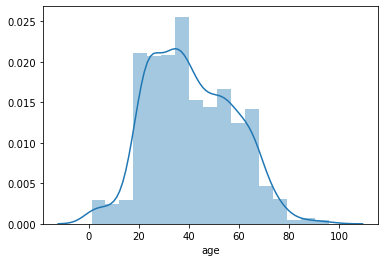

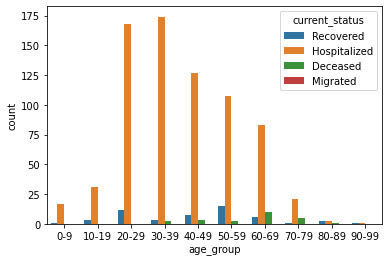

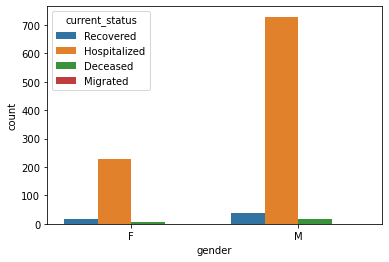

In [53]:
sns.distplot(df_patient['age'])
plt.show()

sns.countplot(x='age_group', hue='current_status', data=df_patient)
plt.show()

sns.countplot(x='gender', hue='current_status', data=df_patient)
plt.show()


In [56]:
all_age = df_patient.groupby(['age_group']).size().reset_index(name='all')
Deceased_age = df_patient[df_patient['current_status']=='Deceased'].groupby(['age_group']).size().reset_index(name='Deceased')
Recovered_age = df_patient[df_patient['current_status']=='Recovered'].groupby(['age_group']).size().reset_index(name='Recovered')

mortality_age = all_age.merge(Deceased_age)
mortality_age = mortality_age.merge(Recovered_age)
mortality_age['mortality_rate'] = mortality_age['Deceased']/mortality_age['all']
display(mortality_age)


all_gender = df_patient.groupby(['gender']).size().reset_index(name='all')
Deceased_gender = df_patient[df_patient['current_status']=='Deceased'].groupby(['gender']).size().reset_index(name='Deceased')
Recovered_gender = df_patient[df_patient['current_status']=='Recovered'].groupby(['gender']).size().reset_index(name='Recovered')

mortality_gender = all_gender.merge(Deceased_gender)
mortality_gender = mortality_gender.merge(Recovered_gender)
mortality_gender['mortality_rate'] = mortality_gender['Deceased']/mortality_gender['all']
display(mortality_gender)

,age_group,all,Deceased,Recovered,mortality_rate
0,0-9,18,0,1,0.000000
1,10-19,34,0,3,0.000000
2,20-29,180,0,12,0.000000
3,30-39,179,2,3,0.011173
4,40-49,137,3,7,0.021898
5,50-59,124,2,15,0.016129
6,60-69,99,10,6,0.101010
7,70-79,27,5,1,0.185185
8,80-89,5,1,2,0.200000
9,90-99,2,0,1,0.000000


,gender,all,Deceased,Recovered,mortality_rate
0,F,253,7,18,0.027668
1,M,782,16,37,0.020460


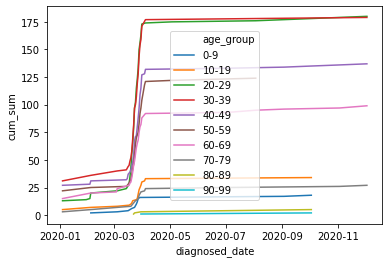

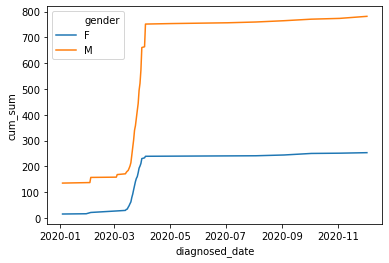

In [52]:
time_age = df_patient.groupby(['diagnosed_date','age_group']).size().reset_index(name='count')
time_age['cum_sum'] = time_age.groupby(['age_group'])['count'].cumsum()
time_age['cum_perc'] = 100*time_age['cum_sum']/time_age['count'].sum()
sns.lineplot(x='diagnosed_date',y='cum_sum',hue_order=['0-9','10-19','20-29','30-39','40-49','50-59','60-69','70-79','80-89','90-99'],hue='age_group',data=time_age)
plt.show()

time_sex = df_patient.groupby(['diagnosed_date','gender']).size().reset_index(name='count')
time_sex['cum_sum'] = time_sex.groupby(['gender'])['count'].cumsum()
time_sex['cum_perc'] = 100*time_sex['cum_sum']/time_sex['count'].sum()
sns.lineplot(x='diagnosed_date',y='cum_sum',hue='gender',data=time_sex)
plt.show()